In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

In [22]:
img = imread('dog.jpg')

# convert to grayscale to get 2D matrix
img = np.mean(img, axis=-1)

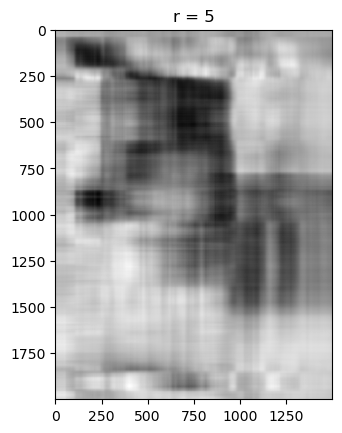

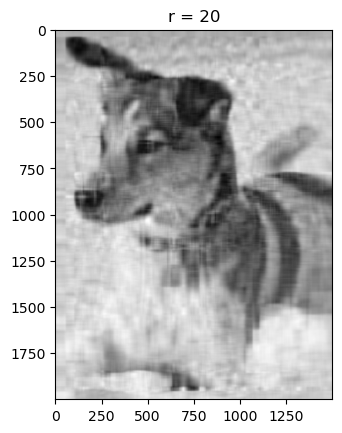

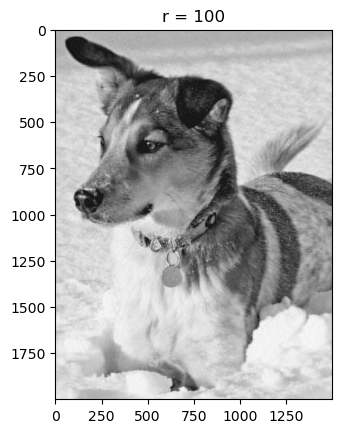

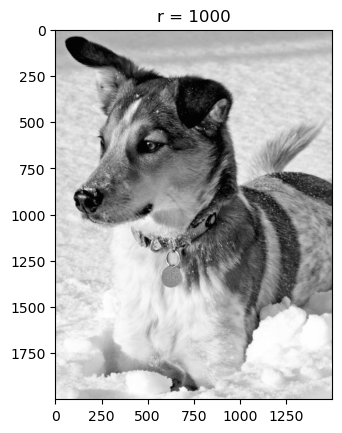

In [23]:
U, S, VT = np.linalg.svd(img, full_matrices=False)
S = np.diag(S)

# computing economy SVD for different truncations

j = 0
for r in (5, 20, 100, 1000):
    img_approx = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    # plotting each dog image
    plt.figure(j+1)
    j+=1
    img_show = plt.imshow(img_approx)
    img_show.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.show()

In [24]:
S.shape

(1500, 1500)

25 13
rank r for 99% of of frobenius is 650, variance is 350, cumsum is 1161


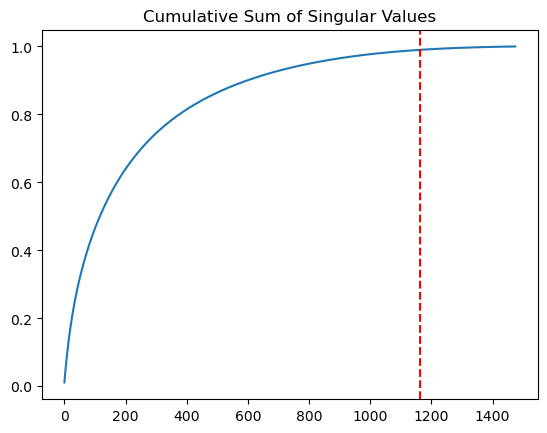

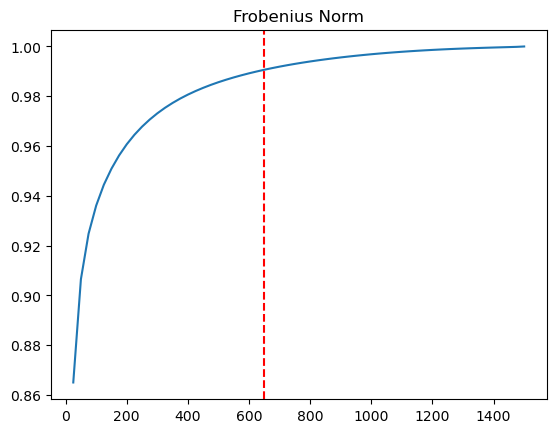

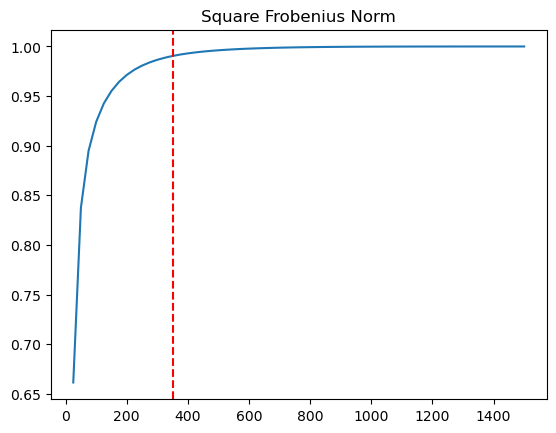

In [54]:
U, S, VT = np.linalg.svd(img, full_matrices=False)
S = np.diag(S)

def get_error(r):
    Ur = U[:, :r]
    Sr = S[0:r, :r]
    VTr = VT[:r, :]

    Xr = Ur @ Sr @ VTr

    # frobenius norm error
    rec_error = np.linalg.norm(img - Xr, ord='fro')

    # fraction of missing variance as function of r
    square_rec_error = rec_error**2

    return rec_error, square_rec_error


rec_error = []
rs = list(range(25, 1501, 25))
square_rec_error = []

for r in rs:
    x = get_error(r)
    rec_error.append(x[0])
    square_rec_error.append(x[1])

cum_sum = np.cumsum(np.diag(S)[25:]) / np.sum(np.diag(S)[25:])


r_cum_sum = np.argmax(cum_sum >= 0.99)

# Frobenius
rec_error_norm = 1 - (rec_error / np.sum(rec_error))
r_frobenius = np.argmax(rec_error_norm >= 0.99)

# Square Frobenius (Variance)
square_rec_error_norm = 1 - (square_rec_error / np.sum(square_rec_error))
r_square_frobenius = np.argmax(square_rec_error_norm >= 0.99)

print(r_frobenius, r_square_frobenius)


print(f"rank r for 99% of of frobenius is {rs[r_frobenius]}, variance is {rs[r_square_frobenius]}, cumsum is {r_cum_sum}")


plt.figure(1)
plt.title("Cumulative Sum of Singular Values")
plt.plot(cum_sum)
plt.axvline(x=r_cum_sum, color='r', linestyle='--')
plt.show()

plt.figure(2)
plt.title("Frobenius Norm")
plt.plot(rs, rec_error_norm)
plt.axvline(x=rs[r_frobenius], color='r', linestyle='--')
plt.show()

plt.figure(3)
plt.title("Square Frobenius Norm")
plt.plot(rs, square_rec_error_norm)
plt.axvline(x=rs[r_square_frobenius], color='r', linestyle='--')
plt.show()

Variance < Frobenius < Cumulative sum